## stanford dog breed 데이터셋 가져오기
- tfds에서 받아오는 것은 데이터 형태가 어떻게 되어있는지 알 수가 없어서 직접 다운로드 했다.

In [ ]:
# stanford dog breed 데이터 세트 다운로드 
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
# 현재 디렉토리인 /content에 바로 압축 해제 
!ls; tar -xvf images.tar

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n02109047-Great_

In [ ]:
!ls; pwd

Images	images.tar  sample_data
/content


In [ ]:
!cd /content/Images;ls

n02085620-Chihuahua			  n02100583-vizsla
n02085782-Japanese_spaniel		  n02100735-English_setter
n02085936-Maltese_dog			  n02100877-Irish_setter
n02086079-Pekinese			  n02101006-Gordon_setter
n02086240-Shih-Tzu			  n02101388-Brittany_spaniel
n02086646-Blenheim_spaniel		  n02101556-clumber
n02086910-papillon			  n02102040-English_springer
n02087046-toy_terrier			  n02102177-Welsh_springer_spaniel
n02087394-Rhodesian_ridgeback		  n02102318-cocker_spaniel
n02088094-Afghan_hound			  n02102480-Sussex_spaniel
n02088238-basset			  n02102973-Irish_water_spaniel
n02088364-beagle			  n02104029-kuvasz
n02088466-bloodhound			  n02104365-schipperke
n02088632-bluetick			  n02105056-groenendael
n02089078-black-and-tan_coonhound	  n02105162-malinois
n02089867-Walker_hound			  n02105251-briard
n02089973-English_foxhound		  n02105412-kelpie
n02090379-redbone			  n02105505-komondor
n02090622-borzoi			  n02105641-Old_English_sheepdog
n02090721-Irish_wolfhound		  n02105855-Shetland_sheepdog
n02091032-Itali

## 라이브러리 가져오기

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
for dirname, _, filenames in os.walk('/content/Images'):
    for filename in filenames[:1]:
        print(os.path.join(dirname, filename))

/content/Images/n02101006-Gordon_setter/n02101006_1208.jpg
/content/Images/n02099267-flat-coated_retriever/n02099267_2268.jpg
/content/Images/n02089867-Walker_hound/n02089867_785.jpg
/content/Images/n02110958-pug/n02110958_14265.jpg
/content/Images/n02091244-Ibizan_hound/n02091244_2542.jpg
/content/Images/n02090622-borzoi/n02090622_8236.jpg
/content/Images/n02093754-Border_terrier/n02093754_4879.jpg
/content/Images/n02088094-Afghan_hound/n02088094_5517.jpg
/content/Images/n02096051-Airedale/n02096051_9327.jpg
/content/Images/n02111277-Newfoundland/n02111277_10333.jpg
/content/Images/n02094433-Yorkshire_terrier/n02094433_1869.jpg
/content/Images/n02100583-vizsla/n02100583_4228.jpg
/content/Images/n02095570-Lakeland_terrier/n02095570_2937.jpg
/content/Images/n02102177-Welsh_springer_spaniel/n02102177_368.jpg
/content/Images/n02107908-Appenzeller/n02107908_691.jpg
/content/Images/n02106662-German_shepherd/n02106662_9481.jpg
/content/Images/n02107312-miniature_pinscher/n02107312_5113.jpg
/

In [ ]:
file_p = '/content/Images/n02089078-black-and-tan_coonhound/n02089078_1472.jpg'

pre = file_p.split('/')[3]
print(pre)
pre_name = pre[pre.find('-')+1:]
print(pre_name)


n02089078-black-and-tan_coonhound
black-and-tan_coonhound


## 파일의 경로와 라벨명을 데이터프레임으로 만들기

In [ ]:
IMAGE_DIR = '/content/Images'

def make_dogbreed_df(image_dir_path = IMAGE_DIR):
    paths= []
    labels = []

    for dirname, _, filenames in os.walk(image_dir_path):
        for filename in filenames:
            if '.jpg' in filename:
                file_path = dirname + '/' + filename
                paths.append(file_path)

                breed = file_path.split('/')[3]
                breed_name = breed[breed.find('-')+1:]
                labels.append(breed_name)

    df = pd.DataFrame({'path' : paths, 'label' : labels})
    return df


In [ ]:
df = make_dogbreed_df()
print('df shape :', df.shape)
df.head()

df shape : (20580, 2)


,path,label
0,/content/Images/n02101006-Gordon_setter/n02101...,Gordon_setter
1,/content/Images/n02101006-Gordon_setter/n02101...,Gordon_setter
2,/content/Images/n02101006-Gordon_setter/n02101...,Gordon_setter
3,/content/Images/n02101006-Gordon_setter/n02101...,Gordon_setter
4,/content/Images/n02101006-Gordon_setter/n02101...,Gordon_setter


In [ ]:
df['label'].value_counts()

Maltese_dog             252
Afghan_hound            239
Scottish_deerhound      232
Pomeranian              219
Bernese_mountain_dog    218
                       ... 
Bouvier_des_Flandres    150
golden_retriever        150
Eskimo_dog              150
Pekinese                149
redbone                 148
Name: label, Length: 120, dtype: int64

## 데이터 이미지 확인하기

In [ ]:
import matplotlib.pyplot as plt
import cv2

def show_images(image_path, ncols=8, title = None):
    figure,axes = plt.subplots(figsize=(20,4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path[i]), cv2.COLOR_BGR2RGB)
        axes[i].imshow(image)
        axes[i].set_title(title)

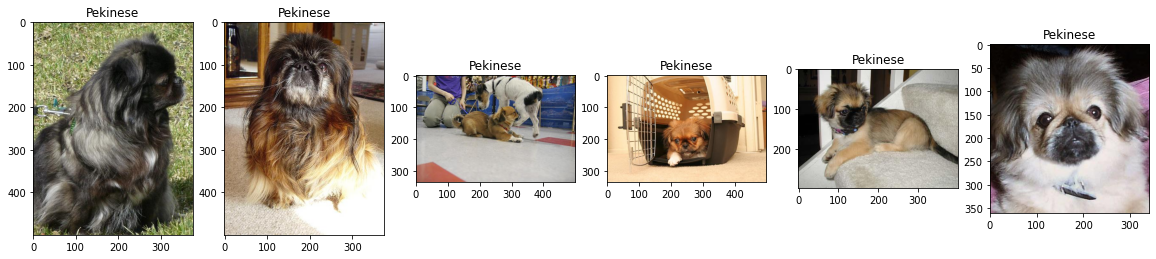

In [ ]:
image_list = df[df['label'] == 'Pekinese']['path'].iloc[:6].tolist()
show_images(image_list, ncols=6, title = 'Pekinese')

## 데이터셋 분리하기

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.4, stratify=df['label'], random_state=2021)

print(train_df.shape, test_df.shape)

(12348, 2) (8232, 2)


In [ ]:
train_df.head()

,path,label
15823,/content/Images/n02091134-whippet/n02091134_17...,whippet
17743,/content/Images/n02096294-Australian_terrier/n...,Australian_terrier
2733,/content/Images/n02106662-German_shepherd/n021...,German_shepherd
8338,/content/Images/n02102973-Irish_water_spaniel/...,Irish_water_spaniel
9197,/content/Images/n02096585-Boston_bull/n0209658...,Boston_bull


In [ ]:
train_path = train_df['path'].values
train_label = pd.get_dummies(train_df['label']).values
print(train_path)
print(train_label)

['/content/Images/n02091134-whippet/n02091134_17608.jpg'
 '/content/Images/n02096294-Australian_terrier/n02096294_1553.jpg'
 '/content/Images/n02106662-German_shepherd/n02106662_4498.jpg' ...
 '/content/Images/n02105505-komondor/n02105505_2178.jpg'
 '/content/Images/n02106030-collie/n02106030_15637.jpg'
 '/content/Images/n02097658-silky_terrier/n02097658_2069.jpg']
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values
print(test_path)
print(test_label)
print(test_path.shape)
print(test_label.shape)

['/content/Images/n02100236-German_short-haired_pointer/n02100236_4676.jpg'
 '/content/Images/n02108089-boxer/n02108089_1748.jpg'
 '/content/Images/n02109961-Eskimo_dog/n02109961_1032.jpg' ...
 '/content/Images/n02106166-Border_collie/n02106166_6415.jpg'
 '/content/Images/n02107683-Bernese_mountain_dog/n02107683_522.jpg'
 '/content/Images/n02090721-Irish_wolfhound/n02090721_2347.jpg']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(8232,)
(8232, 120)


In [ ]:
tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, stratify = train_label, test_size = 0.2, random_state = 2021)
print('학습용 path : ', tr_path.shape)
print('학습용 label : ', tr_label.shape)
print('검증용 path : ', val_path.shape )
print('검증용 label : ', val_label.shape )

학습용 path :  (9878,)
학습용 label :  (9878, 120)
검증용 path :  (2470,)
검증용 label :  (2470, 120)


## Sequence 데이터셋 만들기

In [ ]:
from tensorflow.keras.utils import Sequence
import sklearn
import cv2
import numpy as np

BATCH_SIZE = 64
IMAGE_SIZE = 224

class Dogbreed_Dataset(Sequence):
    def __init__(self, image_file_path, labels, image_size = IMAGE_SIZE, batch_size = BATCH_SIZE, augmentor = None, shuffle = False, pre_func = None):
        self.image_file_path = image_file_path
        self.image_size = image_size
        self.labels = labels
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.shuffle = shuffle
        if self.shuffle:
            self.on_epoch_end()
        self.pre_func = pre_func

    def __len__(self):
        return int(np.ceil(len(self.labels)/self.batch_size))

    def __getitem__(self, index):
        image_batch = self.image_file_path[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size : (index+1)*self.batch_size]
        
        image_array = np.zeros((image_batch.shape[0], self.image_size, self.image_size, 3), dtype = 'float32')

        for image_index in range(image_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_batch[image_index]), cv2.COLOR_BGR2RGB)

            if self.augmentor is not None:
                image = self.augmentor(image = image)['image']
            image = cv2.resize(image, (self.image_size, self.image_size))

            if self.pre_func is not None:
                image = self.pre_func(image)

            image_array[image_index] = image
        
        return image_array, label_batch
    
    def on_epoch_end(self):
        if self.shuffle:
            self.image_file_path, self.labels = sklearn.utils.shuffle(self.image_file_path, self.labels)

        else:
            pass


## Augmentor 만들기
- Cutmix, Mixup을 구현해보려고 했는데 함수로 어떻게 만들어야 하는지 모르겠다...
- 대신 Albumentation 이용해보자

In [ ]:
# # mixup code

# from albumentations.core.transforms_interface import ImageOnlyTransform

# class AugMix(ImageOnlyTransform):
#     """Augmentations mix to Improve Robustness and Uncertainty.
#     Args:
#         image (np.ndarray): Raw input image of shape (h, w, c)
#         severity (int): Severity of underlying augmentation operators.
#         width (int): Width of augmentation chain
#         depth (int): Depth of augmentation chain. -1 enables stochastic depth uniformly
#           from [1, 3]
#         alpha (float): Probability coefficient for Beta and Dirichlet distributions.
#         augmentations (list of augmentations): Augmentations that need to mix and perform.
#     Targets:
#         image
#     Image types:
#         uint8, float32
#     """

#     def __init__(self, width=2, depth=2, alpha=0.5, augmentations=[HorizontalFlip()], always_apply=False, p=0.5):
#         super(AugMix, self).__init__(always_apply, p)
#         self.width = width
#         self.depth = depth
#         self.alpha = alpha
#         self.augmentations = augmentations
#         self.ws = np.float32(np.random.dirichlet([self.alpha] * self.width))
#         self.m = np.float32(np.random.beta(self.alpha, self.alpha))

#     def apply_op(self, image, op):
#         image = op(image=image)["image"]
#         return image

#     def apply(self, img, **params):
#         mix = np.zeros_like(img)
#         for i in range(self.width):
#             image_aug = img.copy()

#             for _ in range(self.depth):
#                 op = np.random.choice(self.augmentations)
#                 image_aug = self.apply_op(image_aug, op)

#             mix = np.add(mix, self.ws[i] * image_aug, out=mix, casting="unsafe")

#         mixed = (1 - self.m) * img + self.m * mix
#         if img.dtype in ["uint8", "uint16", "uint32", "uint64"]:
#             mixed = np.clip((mixed), 0, 255).astype(np.uint8)
#         return mixed

#     def get_transform_init_args_names(self):
#         return ("width", "depth", "alpha")

NameError: ignored

In [ ]:
import albumentations as A

augmentor = A.Compose([
                       A.HorizontalFlip(p=5),
                       A.VerticalFlip(p=5),
                       A.ShiftScaleRotate(p=5)

])

## Pretrained model 만들기

In [ ]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1
from tensorflow.keras.applications import MobileNet
import tensorflow as tf

In [ ]:
def create_model(shape=(224,224,3), n_classes = 120):
    input_tensor = Input(shape=shape)
    base_model = ResNet50V2(include_top = False, weights = 'imagenet', input_tensor = input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation = 'relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(inputs = input_tensor, outputs = output)

    return model

## 데이터셋 만들기
- 와... 진짜 클래스 매개변수에 ,하나 붙어있다고 
'Found input variables with inconsistent numbers of samples' 에러가 뜨네...
- 매개변수 형성할 때 ,(콤마) 주의하자.

In [ ]:
# 학습용, 검증용 데이터 셋
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess

# augmentation이 적용된 데이터셋
tr_ds_aug = Dogbreed_Dataset(tr_path, tr_label, augmentor = augmentor, shuffle = True, pre_func = resnet_preprocess)

# augmentation이 적용되지 않은 데이터셋
tr_ds = Dogbreed_Dataset(tr_path, tr_label, shuffle = True, pre_func = resnet_preprocess)

val_ds = Dogbreed_Dataset(val_path, val_label, pre_func = resnet_preprocess)

print(next(iter(tr_ds_aug))[0].shape, next(iter(tr_ds_aug))[1].shape)
print(next(iter(tr_ds))[0].shape, next(iter(tr_ds))[1].shape)
print(next(iter(val_ds))[0].shape, next(iter(val_ds))[1].shape)

(64, 224, 224, 3) (64, 120)
(64, 224, 224, 3) (64, 120)
(64, 224, 224, 3) (64, 120)


In [ ]:
# 테스트용 데이터 셋
test_ds = Dogbreed_Dataset(test_path, test_label, pre_func = resnet_preprocess)
print(next(iter(test_ds))[0].shape, next(iter(test_ds))[1].shape)

(64, 224, 224, 3) (64, 120)


## 모델 학습(augmentation 적용모델)
- pretrained_model : resnet50

In [ ]:
# augmentation 적용모델

model = create_model()
model.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
rlr_cb = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=4, mode = 'min', verbose=1)
history = model.fit(tr_ds_aug, epochs = 30, validation_data = val_ds, callbacks=([rlr_cb]), verbose=1)

94683136/94668760 [==============================] - 1s 0us/step
Epoch 1/15
155/155 [==============================] - 251s 2s/step - loss: 4.7608 - accuracy: 0.0136 - val_loss: 12.6780 - val_accuracy: 0.0158 - lr: 0.0010
Epoch 2/15
155/155 [==============================] - 205s 1s/step - loss: 4.5047 - accuracy: 0.0317 - val_loss: 7.6417 - val_accuracy: 0.0223 - lr: 0.0010
Epoch 3/15
155/155 [==============================] - 202s 1s/step - loss: 4.2014 - accuracy: 0.0491 - val_loss: 5.3516 - val_accuracy: 0.0259 - lr: 0.0010
Epoch 4/15
155/155 [==============================] - 202s 1s/step - loss: 3.9501 - accuracy: 0.0745 - val_loss: 4.5638 - val_accuracy: 0.0348 - lr: 0.0010
Epoch 5/15
155/155 [==============================] - 201s 1s/step - loss: 3.7286 - accuracy: 0.0994 - val_loss: 4.3145 - val_accuracy: 0.0769 - lr: 0.0010
Epoch 6/15
155/155 [==============================] - 201s 1s/step - loss: 3.5338 - accuracy: 0.1248 - val_loss: 5.5296 - val_accuracy: 0.0255 - lr: 0.001

In [ ]:
# 평가
model.evaluate(test_ds)

129/129 [==============================] - 55s 425ms/step - loss: 3.5208 - accuracy: 0.1760


[3.520756483078003, 0.17602041363716125]

In [ ]:
# augmentation 미적용 모델 training
model2 = create_model()
model2.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
rlr_cb = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=4, mode = 'min', verbose=1)
history2 = model2.fit(tr_ds, epochs = 30, validation_data = val_ds, callbacks=([rlr_cb]),verbose=1)

Epoch 1/15
155/155 [==============================] - 209s 1s/step - loss: 4.4995 - accuracy: 0.0379 - val_loss: 8.6371 - val_accuracy: 0.0235 - lr: 0.0010
Epoch 2/15
155/155 [==============================] - 201s 1s/step - loss: 3.6558 - accuracy: 0.1159 - val_loss: 5.7105 - val_accuracy: 0.0777 - lr: 0.0010
Epoch 3/15
155/155 [==============================] - 201s 1s/step - loss: 2.9893 - accuracy: 0.2124 - val_loss: 4.0535 - val_accuracy: 0.1105 - lr: 0.0010
Epoch 4/15
155/155 [==============================] - 202s 1s/step - loss: 2.4976 - accuracy: 0.3092 - val_loss: 3.1157 - val_accuracy: 0.2113 - lr: 0.0010
Epoch 5/15
155/155 [==============================] - 202s 1s/step - loss: 2.0529 - accuracy: 0.4110 - val_loss: 3.8000 - val_accuracy: 0.1644 - lr: 0.0010
Epoch 6/15
155/155 [==============================] - 202s 1s/step - loss: 1.6757 - accuracy: 0.4901 - val_loss: 2.8626 - val_accuracy: 0.2903 - lr: 0.0010
Epoch 7/15
155/155 [==============================] - 201s 1s/st

In [ ]:
# 평가
model2.evaluate(test_ds)

129/129 [==============================] - 53s 412ms/step - loss: 3.3159 - accuracy: 0.4316


[3.3159403800964355, 0.4316083490848541]

## 회고

- tensorflow에서 다운받는 dogbreed dataset은 어떤 식으로 되어있는지 몰라서 그냥 이미지 폴더를 다 다운받아서 데이터 셋을 만드는 방법을 선택했다. 최근에 keras의 Sequence를 이용한 custom dataset을 만드는 방법을 봤는데 연습해볼겸 이번 project에 적용을 해보았다.

- 문제는 Sequence를 이용한 데이터셋을 만드는 것까지는 좋았는데 여기에 cutmix, augmix를 어떻게 적용해야 하는지 몰라서 헤매게 되었다. 두 개의 이미지를 섞어야 하는데 어떻게 섞어야 할지...

- 그래서 augmentation은 그냥 기본적인 augmentation만 적용하여 모델을 평가해보았다.

- pretrained model로 resnetv2를 사용했고 처음에는 weights에 아무런 값도 주지 않고 모델을 돌려보았는데 epoch가 10이 넘어가도록 성능이 나아지지가 않아 weights에 imagenet을 넣어주고 다시 돌려보았다

- 이미지 사이즈가 커서인지 분류클래스가 120개나 되서 그런지 epochs = 15정도로는 학습은 진행되지만 정확도가 터무니없이 낮게 나왔다. 훨씬 많은 epochs가 필요할 거 같다. 근데 이상한건 augmentation을 적용하지 않은 데이터가 같은 epoch에서 더 성능이 좋게 나온다....왜지? augmentation을 적용하면 학습하는데 시간이 더 오래 걸리는건가?
